In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'E:\\chest_xray\\train\\'
valid_path = 'E:\\chest_xray\\test\\'

In [3]:
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in densenet.layers:
    layer.trainable = False

In [5]:
folders = glob('E:\\chest_xray\\train\\*')

In [6]:
x = Flatten()(densenet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=densenet.input, outputs=prediction)

In [8]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('E:\\chest_xray\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('E:\\chest_xray\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
163/163 [==============================] - 1464s 9s/step - loss: 0.7259 - accuracy: 0.9145 - val_loss: 2.6290 - val_accuracy: 0.7837
Epoch 2/5
163/163 [==============================] - 1492s 9s/step - loss: 0.3737 - accuracy: 0.9471 - val_loss: 0.8508 - val_accuracy: 0.9199
Epoch 3/5
163/163 [==============================] - 1251s 8s/step - loss: 0.4713 - accuracy: 0.9484 - val_loss: 2.7446 - val_accuracy: 0.8221
Epoch 4/5
163/163 [==============================] - 747s 5s/step - loss: 0.3571 - accuracy: 0.9599 - val_loss: 1.1820 - val_accuracy: 0.9183
Epoch 5/5
163/163 [==============================] - 734s 5s/step - loss: 0.3009 - accuracy: 0.9647 - val_loss: 1.9438 - val_accuracy: 0.8782


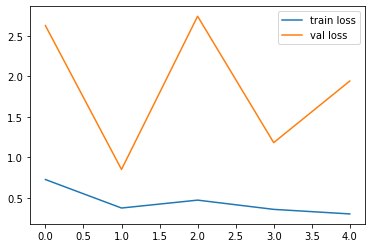

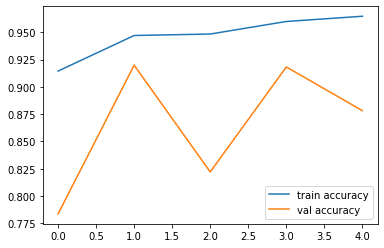

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('E:\\chest_xray\\val\\model_densenet121.h5')